读取1970年之后每月的气温数据（偏离1856-2005年气温平均值的程度）

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 读入1维列表(相当于R中的scan）
Global = np.loadtxt("data/global.dat")
Global = Global.ravel()
index = pd.date_range(start="1856",periods=len(Global),freq="M")
Global = pd.Series(Global,index=index)
temp = Global[Global.index.year>=1970]

产生自变量：时间

In [96]:
t=pd.Series(temp.index.year + (temp.index.month-1)/12,index=temp.index)

产生dummy变量：月份

In [98]:
month = pd.Series(temp.index.month,index=temp.index)
dummy = sm.categorical(month,drop=True)
dummy.index = temp.index

使用最小二乘法拟合参数

注意在模型中没有常数项（因为有季节dummy项了）

In [99]:
X=pd.concat([t,dummy],axis=1)
model = sm.OLS(temp,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     77.04
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           5.51e-98
Time:                        16:58:17   Log-Likelihood:                 287.48
No. Observations:                 432   AIC:                            -549.0
Df Residuals:                     419   BIC:                            -496.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.0177      0.001     30.273      0.000       0.017       0.019
1            -34.9973      1.163    -30.099      0.000     -37.283     -32.712
2            -34.9880      1.163    -30.090      0.000     -37.274     -32.702
3            -35.0100      1.163    -30.107      0.000     -37.296     -32.724
4            -35.0123      1.163    -30.108      0.000     -37.298     -32.726
5            -35.0337      1.163    -30.125      0.000     -37.320     -32.748
6            -35.0251      1.163    -30.116      0.000     -37.311     -32.739
7            -35.0269      1.163    -30.117      0.000     -37.313     -32.741
8            -35.0248      1.163    -30.114      0.000     -37.311     -32.739
9            -35.0383      1.163    -30.124      0.000     -37.325     -32.752
10           -35.0525      1.163    -30.135      0.000     -37.339     -32.766
11           -35.0656      1.163    -30.145      0.000     -37.352     -32.779
12           -35.0487      1.163    -30.129      0.000     -37.335     -32.762
==============================================================================
Omnibus:                        3.712   Durbin-Watson:                   0.575
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.577
Skew:                           0.163   Prob(JB):                        0.167
Kurtosis:                       3.303   Cond. No.                     1.32e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

使用拟合的模型来预测2006-2007年的气温

newt=pd.Series(2006+np.arange(24)/12)

dummy=pd.DataFrame(sm.categorical(np.arange(24)%12+1,drop=True))
newt=pd.concat([newt,dummy],axis=1)
newt.index = pd.date_range(start="2006",periods=len(newt),freq="M")

In [120]:
pred=fit.predict(newt)
pred

2006-01-31    0.524146
2006-02-28    0.534868
2006-03-31    0.514340
2006-04-30    0.513562
2006-05-31    0.493618
2006-06-30    0.503729
2006-07-31    0.503368
2006-08-31    0.506979
2006-09-30    0.494896
2006-10-31    0.482201
2006-11-30    0.470590
2006-12-31    0.488924
2007-01-31    0.541853
2007-02-28    0.552576
2007-03-31    0.532048
2007-04-30    0.531270
2007-05-31    0.511326
2007-06-30    0.521437
2007-07-31    0.521076
2007-08-31    0.524687
2007-09-30    0.512603
2007-10-31    0.499909
2007-11-30    0.488298
2007-12-31    0.506631
Freq: M, dtype: float64

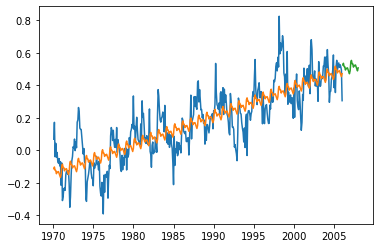

In [121]:
plt.plot(temp)
plt.plot(fit.fittedvalues)
plt.plot(pred)